# Visão Computacional

## Detecção de faces

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def show_image(imagem: np.ndarray, RGB=True):

    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    if RGB:
        plt.imshow(imagem_rgb)
        plt.axis('off') 
        plt.show()
    else:
        plt.imshow(imagem)
        plt.axis('off') 
        plt.show()


In [3]:
image_path: str = r'C:\Users\VictorCampos\Udemy\Data_Science\VisaoComputacional\Imagens\workplace-1245776_1920.jpg'


In [4]:
imagem: np.ndarray = cv2.imread(image_path)

# Converter de BGR (OpenCV) para RGB (Matplotlib)
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)


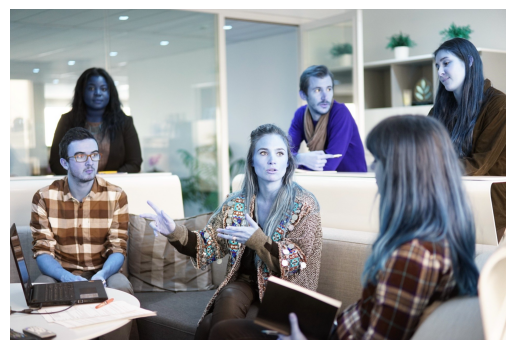

In [5]:
show_image(imagem=imagem_rgb)

O `haarcascade_frontalface_default` é um algoritmo já treinado que será utilizado aqui junto do OpenCV para classificação das faces.

In [6]:
cascade_classifier_path: str = r'haarcascade_frontalface_default.xml'
face_detector = cv2.CascadeClassifier(cascade_classifier_path)

In [7]:
# Converter a imagem para escala de cinza (0-256)
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

imagem_cinza.shape 

(1280, 1920)

In [8]:
deteccoes = face_detector.detectMultiScale(image=imagem_cinza, scaleFactor=1.3, minSize=(30,30)) # np.ndarray [[x, y, l, a]]

# bounding box (largura, altura)

In [9]:
print(deteccoes)
print("7 faces detectadas", deteccoes.shape)

[[ 284  262  114  114]
 [1635  156  147  147]
 [1149  260  129  129]
 [ 222  507  151  151]
 [ 928  491  171  171]]
7 faces detectadas (5, 4)


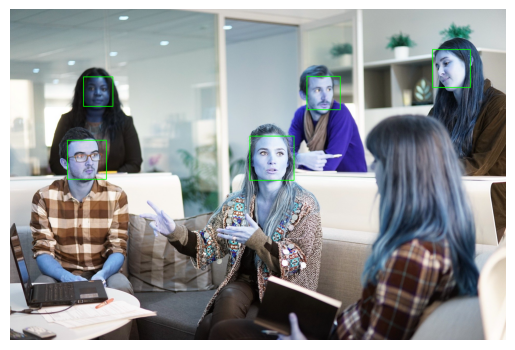

In [10]:
## Desenhar na Imagem RGB

verde = (0, 255, 0) # em BGR

for x, y, largura, altura in deteccoes:
    # imagem_rgb
    cv2.rectangle(img=imagem_rgb, pt1=(x, y), pt2=(x + largura,y + altura), color=verde, thickness=2)

show_image(imagem=imagem_rgb)    

O algoritmo achou dois falsos positivos ao utilizar o `detectMultiScale` sem argumentos . Podemos consertar isso adicionando um fator de escala em nosso detector:   
- `scaleFactor = 1.3`
- `minSize = (30,30)`  

## Detecção de Corpo

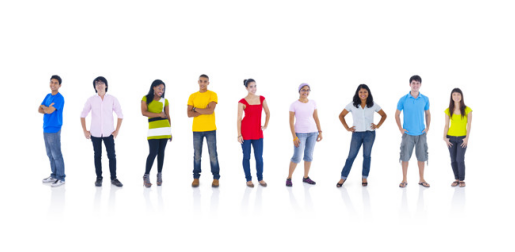

In [14]:
body_clf_path: str = r'fullbody.xml'

image_body_path: str = r'C:\Users\VictorCampos\Udemy\Data_Science\VisaoComputacional\Imagens\pessoas.jpg'

imagem_corpo: np.ndarray = cv2.imread(image_body_path)

# Converter a imagem pra cinza
imagem_corpo_cinza = cv2.cvtColor(imagem_corpo, cv2.COLOR_BGR2GRAY)

show_image(imagem=imagem_corpo)


In [15]:
body_detector = cv2.CascadeClassifier(body_clf_path)
deteccoes_corpo = body_detector.detectMultiScale(image=imagem_corpo_cinza) # np.ndarray [[x, y, l, a]]


In [20]:
deteccoes_corpo

array([[195,  47,  96, 192],
       [461,  60,  92, 184],
       [266,  80,  75, 151],
       [ 70,  57,  95, 189],
       [144, 100,  71, 142],
       [536, 124,  56, 112],
       [ 12,  66,  90, 180],
       [327,  69,  84, 169],
       [431, 168,  32,  64]])

In [ ]:
deteccoes_corpo.shape
# Encontrou os 9

(9, 4)

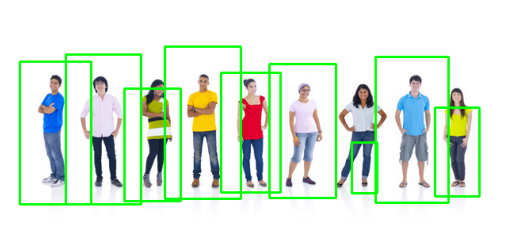

In [18]:
## Desenhar na Imagem RGB

verde = (0, 255, 0) # em BGR

for x, y, largura, altura in deteccoes_corpo:
    # imagem_rgb
    cv2.rectangle(img=imagem_corpo, pt1=(x, y), pt2=(x + largura,y + altura), color=verde, thickness=2)

show_image(imagem=imagem_corpo)  